# Silicon valley predictions

### This is the following step of my EDA

In [5]:
#Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import learning_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline

import pickle

import warnings
warnings.simplefilter(action="ignore")

In [118]:
raw_data = pd.read_csv('data/housing_train_data.txt', sep=",")
raw_data

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [55]:
raw_data = pd.get_dummies(raw_data, columns=["ocean_proximity"], prefix=["loc"],drop_first=True)

In [56]:
#I'll check later on what I am going to do with theses 
raw_data = raw_data.drop(['Unnamed: 0'], axis=1)

# 1st itteration

I will predict the 176 missing values using the raw dataset, then perform a StandardScaler and a Linear Regression using all the features

In [57]:
#Separate Null data as test data
is_null = raw_data.isnull()
row_has_null = is_null.any(axis=1)
test_data = raw_data[row_has_null]

In [58]:
#Drop the null values from the dataframe and considers as train data
train_data = raw_data[raw_data['total_bedrooms'] > 0]

In [59]:
#Values from the dataframe with non Null
y_train = train_data['total_bedrooms']
X_train = train_data.drop(['total_bedrooms'], axis=1)

# X_test means 'dataset' expect 
X_test = test_data.drop(['total_bedrooms'], axis=1)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)

In [60]:
y_pred = np.round(y_pred)
y_pred

test_data.loc[test_data.total_bedrooms.isnull(), "total_bedrooms"] = y_pred

### Missing values filled zith predicted ones

In [61]:
test_data.loc[test_data.total_bedrooms.isnull(), "total_bedrooms"] = y_pred

In [62]:
#Joining the 2 datasets
data_clean = train_data.append(test_data, ignore_index=True)

# This is where all my models will start

In [63]:
data_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,loc_INLAND,loc_ISLAND,loc_NEAR BAY,loc_NEAR OCEAN
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,1,0,0,0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,0,0,0,0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,1,0,0,0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,0,0,0,0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-119.73,34.44,38.0,1729.0,430.0,801.0,395.0,3.1364,357500.0,0,0,0,1
16508,-122.28,37.51,33.0,4719.0,814.0,1980.0,757.0,6.1064,405000.0,0,0,0,1
16509,-118.28,34.06,42.0,2472.0,1084.0,3795.0,1179.0,1.2254,162500.0,0,0,0,0
16510,-122.23,38.17,45.0,350.0,113.0,225.0,72.0,1.8942,216700.0,0,0,1,0


# 1st iteration

In [64]:
# define X, y

y = data_clean["median_house_value"]
X = data_clean.drop(["median_house_value"], axis=1)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=7)



pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, y_train)
pipe.predict(X_test)
pipe.score(X_test, y_test)

0.6642659561765447

In [65]:
y_pred = pipe.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 49022.23730843731
RMSE: 66836.04647297683


This is not a good score, I will try to change my metric

# 2nd iteration

In this one I will try a MinMaxScaler and a LinearRegression using all the features

In [66]:
# define X, y

y = data_clean["median_house_value"]
X = data_clean.drop(["median_house_value"], axis=1)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=7)



pipe2 = make_pipeline(RobustScaler(), LinearRegression())
pipe2.fit(X_train, y_train)
pipe2.predict(X_test)
pipe2.score(X_test, y_test)

0.6642659561765447

In [67]:
y_pred = pipe.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 49022.23730843731
RMSE: 66836.04647297683


There is no changes

# 3rd iteration

On this one i had the best score, using MinMaxScaler, a Kmeans and a KNN but the model was over fitting

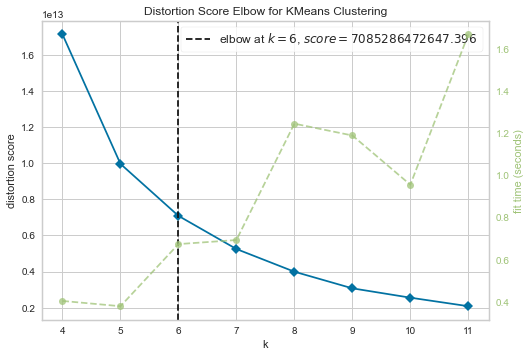

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
X = data_clean 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

In [69]:
kmeans = data_clean

kmeansed = KMeans(n_clusters =6,init='k-means++').fit(kmeans)
kmeansed.labels_
kmeans['kmeans_cluster'] = kmeansed.predict(kmeans)

In [70]:
# define X, y

y = data_clean["median_house_value"]
X = data_clean.drop(["median_house_value", "total_bedrooms", "total_rooms", "latitude"], axis=1)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=7)



over_fit_pipe = make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors=6))
over_fit_pipe.fit(X_train, y_train)
over_fit_pipe.predict(X_test)
over_fit_pipe.score(X_test, y_test)


0.9608324037490863

In [71]:
cv = cross_validate(over_fit_pipe,X, y, cv=5)
print(cv)

{'fit_time': array([0.08694482, 0.08636284, 0.09374905, 0.07812166, 0.10326958]), 'score_time': array([0.14470935, 0.16120291, 0.12499428, 0.17147374, 0.23575783]), 'test_score': array([0.96723435, 0.95781258, 0.96269751, 0.95985088, 0.95379955])}


In [72]:
y_pred = over_fit_pipe.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 16201.75097564258
RMSE: 22828.455066773367


In [73]:
# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = over_fit_pipe,
                                          X = X,
                                          y = y,
                                          train_sizes = [5,10,50,100,200,300,400,1000],
                                          cv = 5,
                                          shuffle = True,
                                          random_state=3)

In [74]:
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

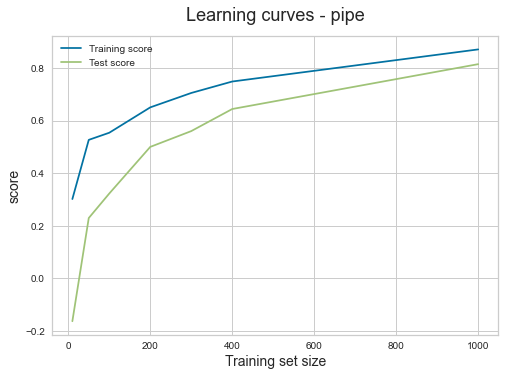

In [75]:
# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves - pipe', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

### ALERT OVER FIT, dump this model

# 4th iteration

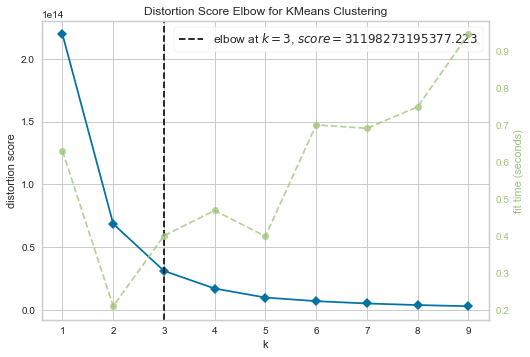

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
X = data_clean 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

In [77]:
kmeans = data_clean

kmeansed = KMeans(n_clusters =3,init='k-means++').fit(kmeans)
kmeansed.labels_
kmeans['kmeans_cluster'] = kmeansed.predict(kmeans)

In [78]:
# define X, y

y = data_clean["median_house_value"]
X = data_clean.drop(["median_house_value"], axis=1)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=7)



best_pipe = make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors=10))
best_pipe.fit(X_train, y_train)
best_pipe.predict(X_test)
best_pipe.score(X_test, y_test)


0.9112276000930646

In [79]:
cv = cross_validate(best_pipe,X, y, cv=5)
print(cv)

{'fit_time': array([0.12891865, 0.11792922, 0.11992264, 0.10093856, 0.12466288]), 'score_time': array([0.3088088 , 0.34478712, 0.2878232 , 0.24003839, 0.47770381]), 'test_score': array([0.90955171, 0.91268899, 0.91245898, 0.90499884, 0.90407918])}


In [80]:
y_pred = best_pipe.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 26069.378845377476
RMSE: 34367.824508530946


In [81]:
# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = best_pipe,
                                          X = X,
                                          y = y,
                                          train_sizes = [5,10,50,100,200,300,400,1000],
                                          cv = 5,
                                          shuffle = True,
                                          random_state=3)

In [82]:
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

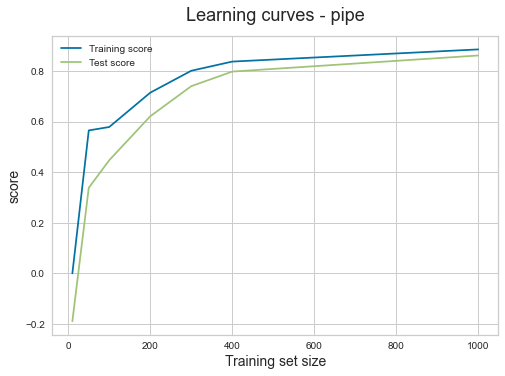

In [83]:
# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves - pipe', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

### Best one so far! 

# 5th iteration ( Model without the 500K goods )

same model as before

In [97]:
no_out_data = data_clean[data_clean['median_house_value'] < 500001]

In [98]:
no_out_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,loc_INLAND,loc_ISLAND,loc_NEAR BAY,loc_NEAR OCEAN,kmeans_cluster
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,1,0,0,0,0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,0,0,0,0,2
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,1,0,0,0,0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,0,0,0,0,2
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-119.73,34.44,38.0,1729.0,430.0,801.0,395.0,3.1364,357500.0,0,0,0,1,1
16508,-122.28,37.51,33.0,4719.0,814.0,1980.0,757.0,6.1064,405000.0,0,0,0,1,1
16509,-118.28,34.06,42.0,2472.0,1084.0,3795.0,1179.0,1.2254,162500.0,0,0,0,0,0
16510,-122.23,38.17,45.0,350.0,113.0,225.0,72.0,1.8942,216700.0,0,0,1,0,2


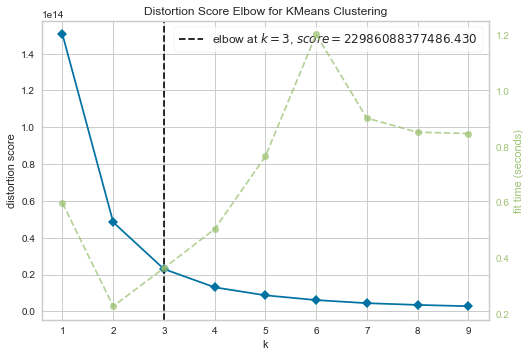

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [99]:
X = no_out_data
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  

In [100]:
kmeans = no_out_data

kmeansed = KMeans(n_clusters =3,init='k-means++').fit(kmeans)
kmeansed.labels_
kmeans['kmeans_cluster'] = kmeansed.predict(kmeans)

In [101]:
# define X, y

y = no_out_data["median_house_value"]
X = no_out_data.drop(["median_house_value"], axis=1)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=10)

no_out_pipe = make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors=9))
no_out_pipe.fit(X_train, y_train)
no_out_pipe.predict(X_test)
no_out_pipe.score(X_test, y_test)


0.8940385555095863

In [102]:
cv = cross_validate(no_out_pipe,X, y, cv=5)
print(cv)

{'fit_time': array([0.11559582, 0.07625842, 0.08189082, 0.07812119, 0.11292505]), 'score_time': array([0.37759042, 0.23318243, 0.22405148, 0.28414106, 0.31005025]), 'test_score': array([0.89913234, 0.89535156, 0.89608519, 0.89371431, 0.89179074])}


In [103]:
y_pred = no_out_pipe.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 24030.34005878895
RMSE: 31682.34300722648


In [104]:
# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = no_out_pipe,
                                          X = X,
                                          y = y,
                                          train_sizes = [5,10,50,100,200,300,400,1000],
                                          cv = 5,
                                          shuffle = True,
                                          random_state=3)

In [105]:
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

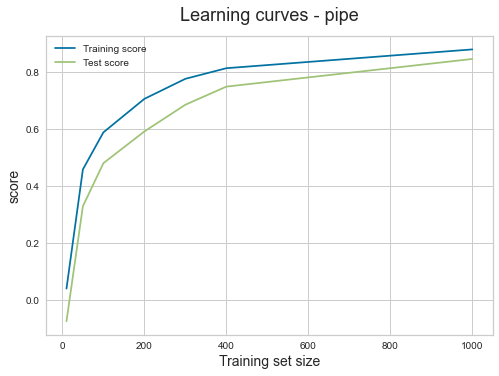

In [106]:
# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves - pipe', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

### My score went down, BUT my mean absolure error is better AND my model isn't over fitting! 

This is my very best model let's do some feature selection

In [107]:
# define X, y

y = no_out_data["median_house_value"]
X = no_out_data.drop(["median_house_value",  "total_bedrooms", "total_rooms", "latitude"], axis=1)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=10)



no_out_selection_pipe = make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors=9))
no_out_selection_pipe.fit(X_train, y_train)
no_out_selection_pipe.predict(X_test)
no_out_selection_pipe.score(X_test, y_test)


0.8923854675604361

In [108]:
cv = cross_validate(no_out_selection_pipe,X, y, cv=5)
print(cv)

{'fit_time': array([0.10493374, 0.07812166, 0.09374642, 0.06249619, 0.0843904 ]), 'score_time': array([0.15900278, 0.15624475, 0.18887615, 0.21076369, 0.30040693]), 'test_score': array([0.89825028, 0.89311921, 0.89506623, 0.89032762, 0.88924081])}


In [109]:
y_pred = no_out_selection_pipe.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 24286.544667842445
RMSE: 31928.522215202112


Score isnt better I will keep it with all the features

# One try with StandardScaler

In [110]:
# define X, y

y = no_out_data["median_house_value"]
X = no_out_data.drop(["median_house_value"], axis=1)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=10)



no_out_ss_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=9))
no_out_ss_pipe.fit(X_train, y_train)
no_out_ss_pipe.predict(X_test)
no_out_ss_pipe.score(X_test, y_test)


0.8782426099918756

In [111]:
y_pred = no_out_ss_pipe.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 24769.733309817755
RMSE: 33961.82513203997


# One try with Robust Scaler

In [112]:
# define X, y

y = no_out_data["median_house_value"]
X = no_out_data.drop(["median_house_value"], axis=1)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=10)



no_out_rs_pipe = make_pipeline(RobustScaler(), KNeighborsRegressor(n_neighbors=9))
no_out_rs_pipe.fit(X_train, y_train)
no_out_rs_pipe.predict(X_test)
no_out_rs_pipe.score(X_test, y_test)


0.8742560962204657

In [113]:
y_pred = no_out_rs_pipe.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 25214.70687830688
RMSE: 34513.32698504561


Not better for both of them

# Conclusion

As a conclusion, the best score I had was not the best model, 

-I had 0.96 score and a MAE of 14,000$ but the model was over fitting

-Then I had a 0.91 score and a MAE of 26 000$ and the model was good

-Then I decided to take off the values that were messing our predictions, so that means goods stacked at 500K and I got my lowest MAE ever 24K and the model was good

-Feature selection didn't get me high enough score so I used all the features for the predictions

# Model to use, that fits the best

# Pickle export


In [114]:
# Export pipeline as pickle file
with open("model.pkl", "wb") as file:
    pickle.dump(no_out_selection_pipe, file)